# Variance and PPP


In [1]:
# Importing packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import nc_time_axis



In [119]:
# Loading the Control Data and Separating it into TSS, SSS, and NPP files
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
           + 'ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/'+
           'pp/ocean_month/ts/monthly/5yr/ocean_month')
ds_tss = xr.open_mfdataset(rootdir+'*tos.nc')
ds_sss = xr.open_mfdataset(rootdir+'*sos.nc')
ds_npp = xr.open_mfdataset(rootdir+'*MLD_003.nc')


In [2]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

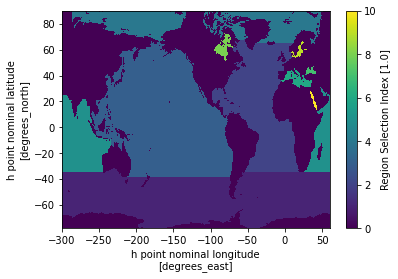

In [5]:
grid.basin.plot()
# use xarray where to grab stuff in particular basin
#where grid geolat > 0 --> gives north atlantic, ( can subset the basins more )

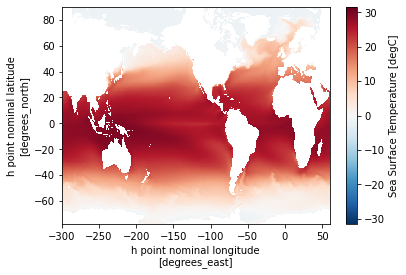

In [121]:
#month is 0 indexed, returns the average over 300 years for a particular month
def month_average(ds,month):
    month_ds = ds.isel(time=slice(month,3600,12))
    mean = month_ds.mean(dim='time',keep_attrs=True)
    return mean

jan_tss = month_average(ds_tss,0)
jan_tss['tos'].plot()

In [122]:
# returns a dataset containing all the control data for a particular month
def month_ds(ds,month):
    return ds.isel(time=slice(month,3600,12))

#do groupby
jan_ds = month_ds(ds_tss,0)
feb_ds = month_ds(ds_tss,1)

In [123]:
#returns a 0-indexed list of all monthly averages
def month_averages(ds):
    averages = [*range(12)]
    for month in range(12):
        averages[month] = month_average(ds, month)
    return averages
        

In [124]:
# returns the standard deviation for a particular month
def month_std(ds, month):
    month = month_ds(ds, month)
    std = month.std(dim='time',keep_attrs=True)
    return std


In [125]:
# returns the standard deviation for all months in a 0-indexed list
def allmonth_std(ds):
    stds = [*range(12)]
    for month in range(12):
        stds[month] = month_std(ds, month)
    return stds

def allmonth_var(ds):
    vars = [*range(12)]
    for month in range(12):
        std = month_std(ds, month)
        vars[month] = std ** 2
    return vars


In [126]:
monthly_stddev = allmonth_var(ds_tss)

In [127]:
#monthly_stddev = allmonth_std(ds_tss)

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


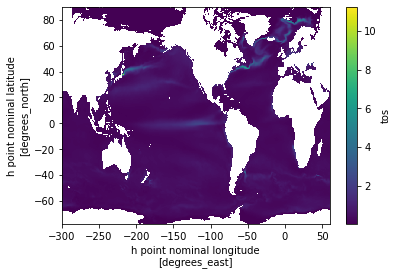

In [128]:
monthly_stddev[3]['tos'].plot()

In [129]:
# start_yrs = ['0123','0161','0185','0208','0230','0269','0300','0326','0359','0381']
# members = [*range(9)]
# ensembles = np.arange(90).reshape((10, 9))
# da_ensembles = xr.DataArray(ensembles, dims=['start','member'], coords={'start': start_yrs, 'member': members})
# da_ensembles.sel(member=0)

In [130]:
# for start_year in range(10):
#     for mem in range(9):
#         folder = 'ESM4_piControl_D-ensemble-' + start_yrs[start_year] + '0101-0' + str(mem + 1)
#         print(folder)
#         path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
#                 + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
#         data = xr.open_mfdataset(path)
#         da_ensembles[start=start_year, member=mem] = data
        

In [131]:
tenyears = ds_tss.sel(time=slice('0208-01-16','0217-12-16'))
end = '0' + str(int('0208') + 9)
end
ten_yrs = ds_tss.sel(time=slice('0208-01-16',end+'-12-16'))
ten_yrs

<xarray.Dataset>
Dimensions:    (xh: 720, yh: 576, time: 120, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time       (time) object 0208-01-16 12:00:00 ... 0217-12-16 12:00:00
  * nv         (nv) float64 1.0 2.0
  * xq         (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq         (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * zl         (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos        (time, yh, xh) float32 dask.array<chunksize=(36, 576, 720), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(36, 2), meta=np.ndarray>
Attributes:
    filename:          01010101.ocean_month.nc
    title:             ESM4_piControl_D
    associated_files:  areacello: 01010101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           2022-03-14 17:08:51 -0400: PostProcessing::PPNetCDF::t...

In [153]:
#finds the average across all ensemble members for a particular start year, INCLUDING THE CONTROL
def ensemble_avg(start_year):
    # initialize the sum to be the control
    folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-01'
    path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
                + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
    total = xr.open_mfdataset(path)
    print(folder)
    for member in range(1,9):
        folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-0' + str(member + 1)
        print(folder)
        path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
                + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
        ds = xr.open_mfdataset(path)
        total = total + ds
    avg = total / 9
    return avg


In [154]:
#testing avg method above
ens3avg = ensemble_avg('0208')

ESM4_piControl_D-ensemble-02080101-01
ESM4_piControl_D-ensemble-02080101-02
ESM4_piControl_D-ensemble-02080101-03
ESM4_piControl_D-ensemble-02080101-04
ESM4_piControl_D-ensemble-02080101-05
ESM4_piControl_D-ensemble-02080101-06
ESM4_piControl_D-ensemble-02080101-07
ESM4_piControl_D-ensemble-02080101-08
ESM4_piControl_D-ensemble-02080101-09


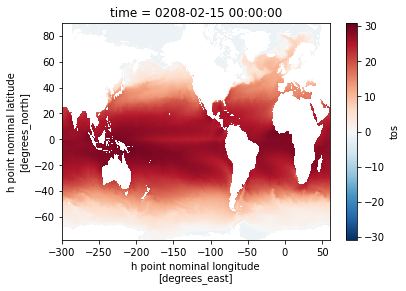

In [155]:
ens3avg['tos'].isel(time=1).plot()

In [156]:
def ensemble_stddev(start_year):
    
    #first, let's get the average of the ensemble
    avg = ensemble_avg(start_year)
    
    # then, initialize the sum of squares to be the squared diff of the first ensemble member
    folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-01'
    path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
                + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
    initial = xr.open_mfdataset(path)
    sum_sqr = (initial-avg)**2
    
    for member in range(1,9):
        folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-0' + str(member + 1)
        path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
                + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
        print(path)
        ds = xr.open_mfdataset(path)
        sum_sqr = sum_sqr + (ds-avg)**2
        
    sum_sqr = sum_sqr / 8
    return sum_sqr

ens3_stddev = ensemble_stddev('0208')
ens3_stddev

ESM4_piControl_D-ensemble-02080101-01
ESM4_piControl_D-ensemble-02080101-02
ESM4_piControl_D-ensemble-02080101-03
ESM4_piControl_D-ensemble-02080101-04
ESM4_piControl_D-ensemble-02080101-05
ESM4_piControl_D-ensemble-02080101-06
ESM4_piControl_D-ensemble-02080101-07
ESM4_piControl_D-ensemble-02080101-08
ESM4_piControl_D-ensemble-02080101-09
/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-02080101-02/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc
/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-02080101-03/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc
/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-02080101-04/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc
/projects/SOC

<xarray.Dataset>
Dimensions:    (xh: 720, yh: 576, time: 120, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time       (time) object 0208-01-16 12:00:00 ... 0217-12-16 12:00:00
  * nv         (nv) float64 1.0 2.0
  * xq         (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq         (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * zl         (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos        (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>

In [173]:
STARTS = ['0123','0161','0185','0208','0230','0269','0300','0326','0359','0381']
def all_ens_stddev():
    # initialize total to be stddev of first ensemble - year '0123'
    total = ensemble_stddev(STARTS[0])
    for ens in range(1,10):
        total = total + ensemble_stddev(STARTS[ens])
        print(STARTS[ens])
    return total/10
    total
ens_stddev = all_ens_stddev()

IndentationError: unexpected indent (2481136386.py, line 4)

In [175]:
total = ensemble_stddev(STARTS[0])
total = total + ensemble_stddev(STARTS[1])
total

ESM4_piControl_D-ensemble-01230101-01
ESM4_piControl_D-ensemble-01230101-02
ESM4_piControl_D-ensemble-01230101-03
ESM4_piControl_D-ensemble-01230101-04
ESM4_piControl_D-ensemble-01230101-05
ESM4_piControl_D-ensemble-01230101-06
ESM4_piControl_D-ensemble-01230101-07
ESM4_piControl_D-ensemble-01230101-08
ESM4_piControl_D-ensemble-01230101-09
/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-01230101-02/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc
/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-01230101-03/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc
/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-01230101-04/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc
/projects/SOC

<xarray.Dataset>
Dimensions:    (time: 0, xh: 720, yh: 576, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * time       (time) object 
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * nv         (nv) float64 1.0 2.0
  * xq         (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq         (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * zl         (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos        (time, yh, xh) float32 dask.array<chunksize=(0, 576, 720), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(0, 2), meta=np.ndarray>

In [ ]:
for ens in range(1,10):
    total = total + ensemble_stddev(STARTS[ens])
    print(STARTS[ens])


In [170]:
ens_std_globalmean = ens_stddev['tos'].weighted(grid['areacello']).mean(['xh','yh'])


In [171]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ens_std_globalmean = ens_std_globalmean.compute()

[########################################] | 100% Completed | 18.6s


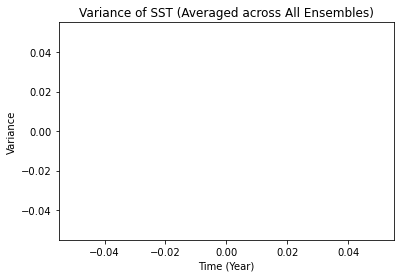

In [172]:
ens_std_globalmean.plot()
plt.title('Variance of SST (Averaged across All Ensembles)')
plt.xlabel('Time (Year)')
plt.ylabel('Variance')
plt.savefig('Variance of SST (Averaged across All Ensembles)')

In [161]:
control_mean = [*range(12)]
for month in range (12):
    control_mean[month] = monthly_stddev[month]['tos'].weighted(grid['areacello']).mean(['xh','yh'])
    with ProgressBar():
        control_mean[month] = control_mean[month].compute()


[########################################] | 100% Completed | 11.4s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  7.5s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.8s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.2s
[                                        ] | 2% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.6s
[                                        ] | 0% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  5.9s
[                                        ] | 2% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.0s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.3s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.4s
[                                        ] | 1% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.7s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  6.2s
[                                        ] | 2% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.2s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


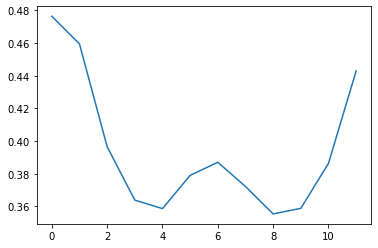

In [162]:
plt.plot(control_mean)

In [163]:
simple = ens3_std_globalmean / control_mean[1]
simpleppp = 1 - simple

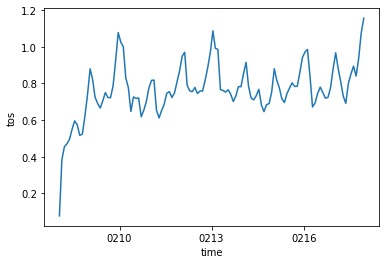

In [164]:
simple.plot()

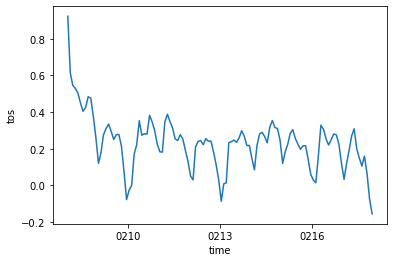

In [165]:
simpleppp.plot()

In [166]:
ppp = [*range(120)]
for t in range(120):
    ppp[t] = 1 - (ens3_std_globalmean.isel(time=t) / control_mean[t%12])

#check out .repeat() for numpy - consider repeating the control mean 

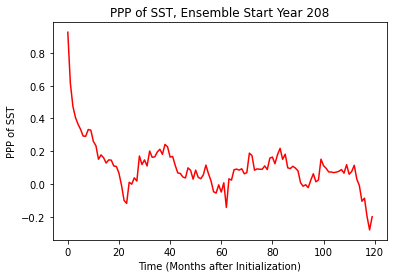

In [167]:
plt.plot(ppp, color='r',mfc='pink' )
plt.title('PPP of SST, Ensemble Start Year 208')
plt.xlabel('Time (Months after Initialization)')
plt.ylabel('PPP of SST')
#plt.savefig('PPP of SST, Ensemble Start Year 208')

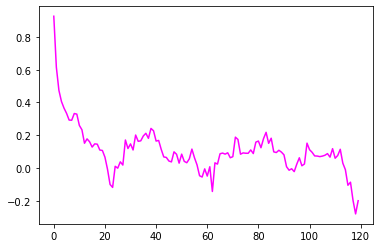

In [168]:
plt.plot(ppp, color='magenta',mfc='pink' )